In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabates_dataset = load_diabetes()
print(diabates_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
print(diabates_dataset.keys())

data = diabates_dataset["data"]
targets = diabates_dataset['target']

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [4]:
targets = (targets - targets.mean(axis=0)) / targets.std()

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def get_model():
    model = Sequential([
            Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
            Dense(128, activation="relu"),
            Dense(128, activation="relu"),
            Dense(128, activation="relu"),
            Dense(128, activation="relu"),
            Dense(128, activation="relu"),
            Dense(1)
    ])
    return model

In [9]:
model = get_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [11]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [12]:
print(model.optimizer)
print(model.optimizer.lr)
print(model.loss)
print(model.metrics)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
mse
[]


In [13]:
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

In [14]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.6232 - mae: 0.5979 - 59ms/epoch - 29ms/step


[0.6232023239135742, 0.5978764295578003]

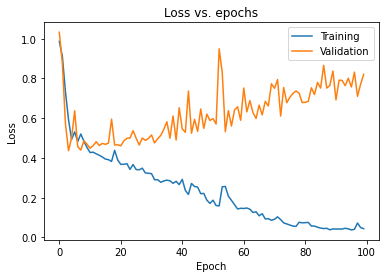

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [19]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [20]:
model = get_regularised_model(1e-5, 0.3)

In [21]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [22]:
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

In [23]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5792 - mae: 0.6249 - 24ms/epoch - 12ms/step


[0.5792397260665894, 0.6249058246612549]

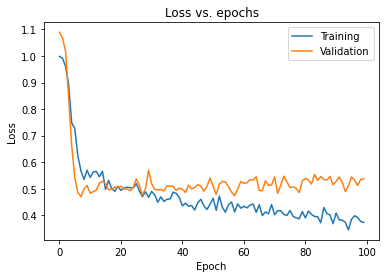

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [26]:
BN_model = Sequential([
        Dense(64, input_shape=[train_data.shape[1],], activation="relu"),
        BatchNormalization(),  # <- Batch normalisation layer
        Dropout(0.5),
        BatchNormalization(),  # <- Batch normalisation layer
        Dropout(0.5),
        Dense(256, activation='relu'),
])

In [27]:
BN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                704       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 256)              

In [28]:
BN_model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, 
    epsilon=0.005,
    axis = -1,
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
    gamma_initializer=tf.keras.initializers.Constant(value=0.9)
))

In [29]:
BN_model.add(Dense(1))

In [30]:
BN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                704       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 256)              

In [31]:
BN_model.compile(optimizer='adam',
                loss='mse',
                metrics=['mae'])

In [32]:
BN_history = BN_model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64,verbose=False)

In [33]:
BN_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5354 - mae: 0.6010 - 33ms/epoch - 16ms/step


[0.535420298576355, 0.6010211706161499]

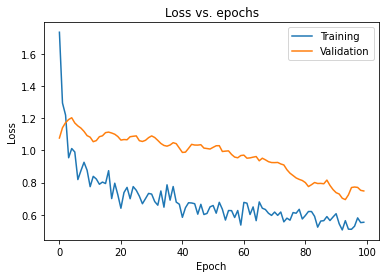

In [34]:
plt.plot(BN_history.history['loss'])
plt.plot(BN_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()